In [1]:
import logging
import numpy as np
import perceval as pcvl
from perceval.algorithm import Sampler
from perceval.components import PS, BS
import sys

from utils import svd_decomposition, print_circuit_structure
from clements import decompose_clements

logging.basicConfig(
    stream=sys.stdout,      # Direct logs to stdout
    level=logging.DEBUG
)

### Input Matrix

In [2]:
# H = 1/np.sqrt(2) * np.array([[1, 1], [1, -1]])

# # Calculate the 2-qubit Hadamard matrix using the Kronecker product
# A = np.kron(H, H).astype(np.complex128)
# A

A = np.array([
    [-0.79, 0.0,  -0.74,  0.0, 0.75,  0.0],
    [ 0.0, -0.79, -0.03, -0.76, 0.03, 0.77],
    [ 0.85, 0.0,   0.80,  0.0,  0.81, 0.0],
    [-0.03,-0.83,  0.0,   0.80, 0.0,  0.81],
    [ 0.83, 0.0,  -0.78,  0.0, -0.79, 0.0],
    [-0.03,-0.81,  0.0,  -0.78, 0.0, -0.79]
]).astype(np.complex128)

### SVD Decomposition

In [3]:
U, S, Vt = svd_decomposition(A)

DEBUG:root:--- 1. Original Matrix A ---
DEBUG:root:[[-0.79+0.j  0.  +0.j -0.74+0.j  0.  +0.j  0.75+0.j  0.  +0.j]
 [ 0.  +0.j -0.79+0.j -0.03+0.j -0.76+0.j  0.03+0.j  0.77+0.j]
 [ 0.85+0.j  0.  +0.j  0.8 +0.j  0.  +0.j  0.81+0.j  0.  +0.j]
 [-0.03+0.j -0.83+0.j  0.  +0.j  0.8 +0.j  0.  +0.j  0.81+0.j]
 [ 0.83+0.j  0.  +0.j -0.78+0.j  0.  +0.j -0.79+0.j  0.  +0.j]
 [-0.03+0.j -0.81+0.j  0.  +0.j -0.78+0.j  0.  +0.j -0.79+0.j]]
DEBUG:root:Input Matrix Shape: (6, 6)
DEBUG:root:--- 2. Decomposition Components ---
DEBUG:root:Matrix U (Left Singular Vectors):
DEBUG:root:[[ 0.4248992 +0.j -0.31062415+0.j -0.37766023+0.j  0.40626539+0.j
   0.43267946+0.j  0.47758033+0.j]
 [ 0.51580996+0.j  0.11304759+0.j -0.12000903+0.j -0.57158057+0.j
   0.45981417+0.j -0.41063943+0.j]
 [-0.36853677+0.j  0.70599058+0.j -0.26193974+0.j -0.14948079+0.j
   0.3411314 +0.j  0.39803315+0.j]
 [ 0.63028995+0.j  0.44409794+0.j  0.32065889+0.j -0.00402977+0.j
  -0.41505456+0.j  0.3611135 +0.j]
 [-0.13734698+0.j -0.3038

### Running Clement's Decomposition

#### Running for Vt

In [4]:
V_c = decompose_clements(Vt)

In [5]:
print_circuit_structure(*V_c)
print(V_c)

--- CIRCUIT CONSTRUCTION (N=6) ---

Layer 0:
  [MZI] connecting WG-0 & WG-1 | phi=0.000, theta=0.759
  [MZI] connecting WG-2 & WG-3 | phi=0.000, theta=1.104
  [MZI] connecting WG-4 & WG-5 | phi=0.000, theta=0.153

Layer 1:
  [MZI] connecting WG-1 & WG-2 | phi=3.142, theta=0.514
  [MZI] connecting WG-3 & WG-4 | phi=1.571, theta=0.161

Layer 2:
  [MZI] connecting WG-0 & WG-1 | phi=4.712, theta=0.743
  [MZI] connecting WG-2 & WG-3 | phi=4.712, theta=0.474
  [MZI] connecting WG-4 & WG-5 | phi=1.571, theta=0.947

Output Phase Screen:
  WG-0: Phase Shifter = -1.571
  WG-1: Phase Shifter = -1.571
  WG-2: Phase Shifter = -1.571
  WG-3: Phase Shifter = -3.142
  WG-4: Phase Shifter = 3.142
  WG-5: Phase Shifter = 1.571
(array([[0.00000000e+00, 1.57079633e+00, 4.71238898e+00],
       [0.00000000e+00, 3.14159265e+00, 1.57079633e+00],
       [0.00000000e+00, 0.00000000e+00, 4.71238898e+00],
       [3.14159265e+00, 1.57079633e+00, 4.71238898e+00],
       [4.44089210e-16, 1.57079633e+00, 1.57079633e+

#### Running For Sigma

In [8]:
S_c = decompose_clements(S)
print_circuit_structure(*S_c)
print(S_c)

--- CIRCUIT CONSTRUCTION (N=6) ---

Layer 0:
  [MZI] connecting WG-0 & WG-1 | phi=3.142, theta=1.571
  [MZI] connecting WG-2 & WG-3 | phi=3.142, theta=1.571
  [MZI] connecting WG-4 & WG-5 | phi=0.000, theta=1.571

Layer 1:
  [MZI] connecting WG-1 & WG-2 | phi=1.571, theta=1.571
  [MZI] connecting WG-3 & WG-4 | phi=3.142, theta=1.571

Layer 2:
  [MZI] connecting WG-0 & WG-1 | phi=0.000, theta=1.571
  [MZI] connecting WG-2 & WG-3 | phi=4.712, theta=1.571
  [MZI] connecting WG-4 & WG-5 | phi=3.142, theta=1.571

Output Phase Screen:
  WG-0: Phase Shifter = 1.571
  WG-1: Phase Shifter = -1.571
  WG-2: Phase Shifter = -1.571
  WG-3: Phase Shifter = 1.571
  WG-4: Phase Shifter = 1.571
  WG-5: Phase Shifter = -1.571
(array([[3.14159265, 3.14159265, 0.        ],
       [3.14159265, 1.57079633, 3.14159265],
       [3.14159265, 0.        , 4.71238898],
       [4.71238898, 3.14159265, 3.14159265],
       [0.        , 1.57079633, 3.14159265]]), array([[1.57079633, 1.57079633, 1.57079633],
       [1

#### Running for U

In [9]:
U_c = decompose_clements(U)
print_circuit_structure(*U_c)
print(U_c)

--- CIRCUIT CONSTRUCTION (N=6) ---

Layer 0:
  [MZI] connecting WG-0 & WG-1 | phi=3.142, theta=1.452
  [MZI] connecting WG-2 & WG-3 | phi=3.142, theta=0.086
  [MZI] connecting WG-4 & WG-5 | phi=6.283, theta=0.736

Layer 1:
  [MZI] connecting WG-1 & WG-2 | phi=0.000, theta=0.103
  [MZI] connecting WG-3 & WG-4 | phi=1.571, theta=0.570

Layer 2:
  [MZI] connecting WG-0 & WG-1 | phi=1.571, theta=0.683
  [MZI] connecting WG-2 & WG-3 | phi=4.712, theta=0.719
  [MZI] connecting WG-4 & WG-5 | phi=1.571, theta=0.607

Output Phase Screen:
  WG-0: Phase Shifter = -1.571
  WG-1: Phase Shifter = -1.571
  WG-2: Phase Shifter = -1.571
  WG-3: Phase Shifter = -3.142
  WG-4: Phase Shifter = 0.000
  WG-5: Phase Shifter = -1.571
(array([[3.14159265e+00, 4.71238898e+00, 1.57079633e+00],
       [0.00000000e+00, 8.88178420e-16, 1.57079633e+00],
       [3.14159265e+00, 3.14159265e+00, 4.71238898e+00],
       [0.00000000e+00, 1.57079633e+00, 1.57079633e+00],
       [6.28318531e+00, 4.71238898e+00, 1.57079633e

### Simulation with Perceval

In [12]:
[v_phis, v_thetas, v_alphas] = V_c
vt_circuit = (
    pcvl.Circuit(6, name="Vt")
    ## MZI 1
    .add(0,PS(phi=0.0))
    .add(0, BS())
    .add(0,PS(phi=2 * 0.759))
    .add(0, BS())

    ## MZI 2
    .add(2,PS(phi=0.0))
    .add(2, BS())
    .add(2,PS(phi=2 * 1.104))
    .add(2, BS())

    ## MZI 3
    .add(4,PS(phi=0.0))
    .add(4, BS())
    .add(4,PS(phi=2 * 0.153))
    .add(4, BS())

    ## MZI 4
    .add(1,PS(phi=3.142))
    .add(1, BS())
    .add(1,PS(phi=2 * 0.514))
    .add(1, BS())

    ## MZI 5
    .add(3,PS(phi=1.571))
    .add(3, BS())
    .add(3,PS(phi=2 * 0.161))
    .add(3, BS())

    ## MZI 6
    .add(0,PS(phi=4.712))
    .add(0, BS())
    .add(0,PS(phi=2 * 0.743))
    .add(0, BS())

    ## MZI 7
    .add(2,PS(phi=4.712))
    .add(2, BS())
    .add(2,PS(phi=2 * 0.474))
    .add(2, BS())

    ## MZI 8
    .add(4,PS(phi=1.571))
    .add(4, BS())
    .add(4,PS(phi=2 * 0.947))
    .add(4, BS())

    # .add(0, PS(phi=v_alphas[0]))
    # .add(1, PS(phi=v_alphas[1]))
    # .add(2, PS(phi=v_alphas[2]))
    # .add(3, PS(phi=v_alphas[3]))
    # .add(4, PS(phi=v_alphas[4]))
    # .add(5, PS(phi=v_alphas[5]))
)

In [13]:
[s_phis, s_thetas, s_alphas] = S_c
s_circuit = (
    pcvl.Circuit(6, name="S")
    ## MZI 1
    .add(0,PS(phi=3.142))
    .add(0, BS())
    .add(0,PS(phi=2 * 1.571))
    .add(0, BS())

    ## MZI 2
    .add(2,PS(phi=3.142))
    .add(2, BS())
    .add(2,PS(phi=2 * 1.571))
    .add(2, BS())

    ## MZI 3
    .add(4,PS(phi=0.0))
    .add(4, BS())
    .add(4,PS(phi=2 * 1.571))
    .add(4, BS())

    ## MZI 4
    .add(1,PS(phi=1.571))
    .add(1, BS())
    .add(1,PS(phi=2 * 1.571))
    .add(1, BS())

    ## MZI 5
    .add(3,PS(phi=3.142))
    .add(3, BS())
    .add(3,PS(phi=2 * 1.571))
    .add(3, BS())

    ## MZI 6
    .add(0,PS(phi=0.0))
    .add(0, BS())
    .add(0,PS(phi=2 * 1.571))
    .add(0, BS())

    ## MZI 7
    .add(2,PS(phi=4.712))
    .add(2, BS())
    .add(2,PS(phi=2 * 1.571))
    .add(2, BS())
    
    ## MZI 8
    .add(4,PS(phi=3.142))
    .add(4, BS())
    .add(4,PS(phi=2 * 1.571))
    .add(4, BS())

    # .add(0, PS(phi=s_alphas[0]))
    # .add(1, PS(phi=s_alphas[1]))
    # .add(2, PS(phi=s_alphas[2]))
    # .add(3, PS(phi=s_alphas[3]))
)

In [15]:
[u_phis, u_thetas, u_alphas] = U_c
u_circuit = (
    pcvl.Circuit(6, name="U")
    ## MZI 1
    .add(0,PS(phi=3.142))
    .add(0, BS())
    .add(0,PS(phi=2 * 1.452))
    .add(0, BS())

    ## MZI 2
    .add(2,PS(phi=3.142))
    .add(2, BS())
    .add(2,PS(phi=2 * 0.086))
    .add(2, BS())

    ## MZI 3
    .add(4,PS(phi=6.283))
    .add(4, BS())
    .add(4,PS(phi=2 * 0.736))
    .add(4, BS())

    ## MZI 4
    .add(1,PS(phi=0.0))
    .add(1, BS())
    .add(1,PS(phi=2 * 0.103))
    .add(1, BS())

    ## MZI 5
    .add(3,PS(phi=1.571))
    .add(3, BS())
    .add(3,PS(phi=2 * 0.570))
    .add(3, BS())

    ## MZI 6
    .add(0,PS(phi=1.571))
    .add(0, BS())
    .add(0,PS(phi=2 * 0.683))
    .add(0, BS())

    ## MZI 7
    .add(2,PS(phi=4.712))
    .add(2, BS())
    .add(2,PS(phi=2 * 0.719))
    .add(2, BS())

    ## MZI 8
    .add(4,PS(phi=1.571))
    .add(4, BS())
    .add(4,PS(phi=2 * 0.607))
    .add(4, BS())
    # .add(0, PS(phi=v_alphas[0]))
    # .add(1, PS(phi=v_alphas[1]))
    # .add(2, PS(phi=v_alphas[2]))
    # .add(3, PS(phi=v_alphas[3]))
    # .add(4, PS(phi=v_alphas[4]))
    # .add(5, PS(phi=v_alphas[5]))
)

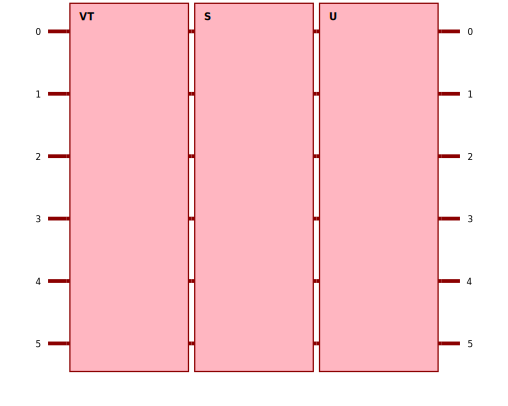

In [17]:
circuit = (pcvl.Circuit(6)
      .add(0, vt_circuit, merge=False)
      .add(0, s_circuit, merge=False)
      .add(0, u_circuit, merge=False)
)

pcvl.pdisplay(circuit, recursive=False)

In [ ]:
circuit.compute_unitary()

In [26]:
p = pcvl.Processor("SLOS", circuit)
p.min_detected_photons_filter(3)
p.compute_physical_logical_perf(True)

p.with_input(pcvl.BasicState([0,1,0,1,0,1]))
sampler = Sampler(p)
probs = sampler.probs()
print(probs['results'])

{
	|0,0,0,1,0,2>: 0.01138643290760214
	|0,0,0,2,0,1>: 0.012448164991925794
	|0,0,0,2,1,0>: 0.04048808547013586
	|0,0,1,0,1,1>: 0.014730627121763715
	|0,0,0,3,0,0>: 0.003243423169285861
	|0,0,1,1,0,1>: 0.002253136009010021
	|0,0,1,1,1,0>: 0.017900135713674888
	|0,0,2,0,1,0>: 0.038314394001792755
	|0,0,2,1,0,0>: 0.0012491983435985842
	|0,1,0,0,0,2>: 0.01672910901622004
	|0,1,0,2,0,0>: 0.0029720212448528793
	|0,0,0,1,1,1>: 0.0035617038555629207
	|0,1,1,0,0,1>: 0.021599625586868558
	|0,0,1,2,0,0>: 0.0034529564798127486
	|1,0,2,0,0,0>: 0.013774639787121939
	|1,1,0,0,0,1>: 0.005230403753022128
	|1,1,0,0,1,0>: 0.0381660329912902
	|2,0,1,0,0,0>: 0.006473340447955906
	|1,1,0,1,0,0>: 0.0003353071974766905
	|1,1,1,0,0,0>: 0.005929809455277974
	|2,0,0,1,0,0>: 0.025024439191694853
	|2,1,0,0,0,0>: 0.01220736466761666
	|0,0,0,0,0,3>: 0.013725884826915388
	|0,2,0,1,0,0>: 0.0016166407191656382
	|0,0,0,0,3,0>: 0.01215497599239846
	|1,0,1,1,0,0>: 0.006467664706097022
	|0,0,0,1,2,0>: 0.03642949813236884
	